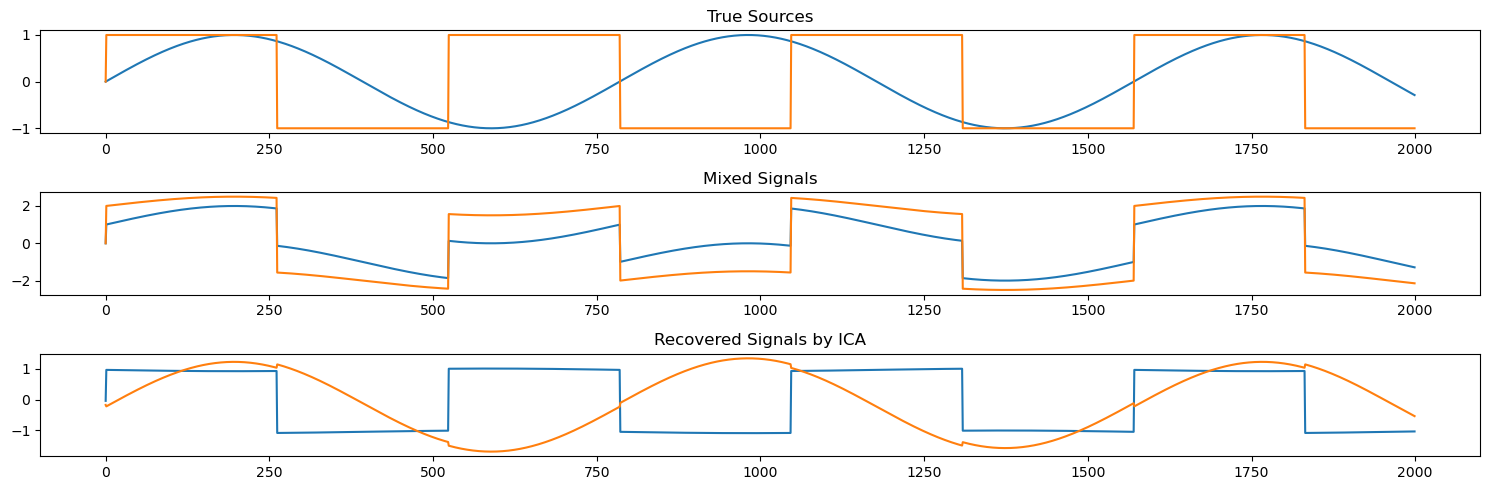

In [7]:
# In this example, we'll create two artificial 'audio' signals, mix them,
# and then use the ICA algorithm to separate the mixed signals.

from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(23)

# Time vector for signal
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Create two artificial signals
s1 = np.sin(2 * time)  # Signal 1: Sine wave
s2 = np.sign(np.sin(3 * time))  # Signal 2: Square wave

# Combine signals into a matrix
S = np.c_[s1, s2]

# Mix the signals
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = S.dot(A.T)  # Mixed signals

# Initialize FastICA with two components
ica = FastICA(n_components=2)

# Fit the model and recover signals
S_ = ica.fit_transform(X)  # Reconstructed signals
A_ = ica.mixing_  # Get estimated mixing matrix

# Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(3, 1, 1)
plt.title('True Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Mixed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Recovered Signals by ICA')
plt.plot(S_)
plt.tight_layout()
plt.show()

生成了两个合成的音频信号:一个是正弦波，另一个是方波。然后，我们将这两个信号混合，并使用FastICA算法尝试分离混合后的信号.

In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
data_path = "D:\\数字经济与数据分析_2025年暑假\\sp500_dataset.csv"
data = pd.read_csv(data_path)

# 提取需要的特征列
features = data.iloc[:, 3:7]  # annual_return_log, Std, Skewness, Kurtosis
sectors = data.iloc[:, 2]     # sector列

# 数据标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


混合矩阵(各原始变量对成分的贡献):
                        IC1       IC2       IC3
annual_return_log  0.030553  0.390005  0.800339
Std                0.255703 -0.495417 -0.650653
Skewness          -0.557034  0.780794 -0.215736
Kurtosis          -0.552071 -0.817559  0.143333


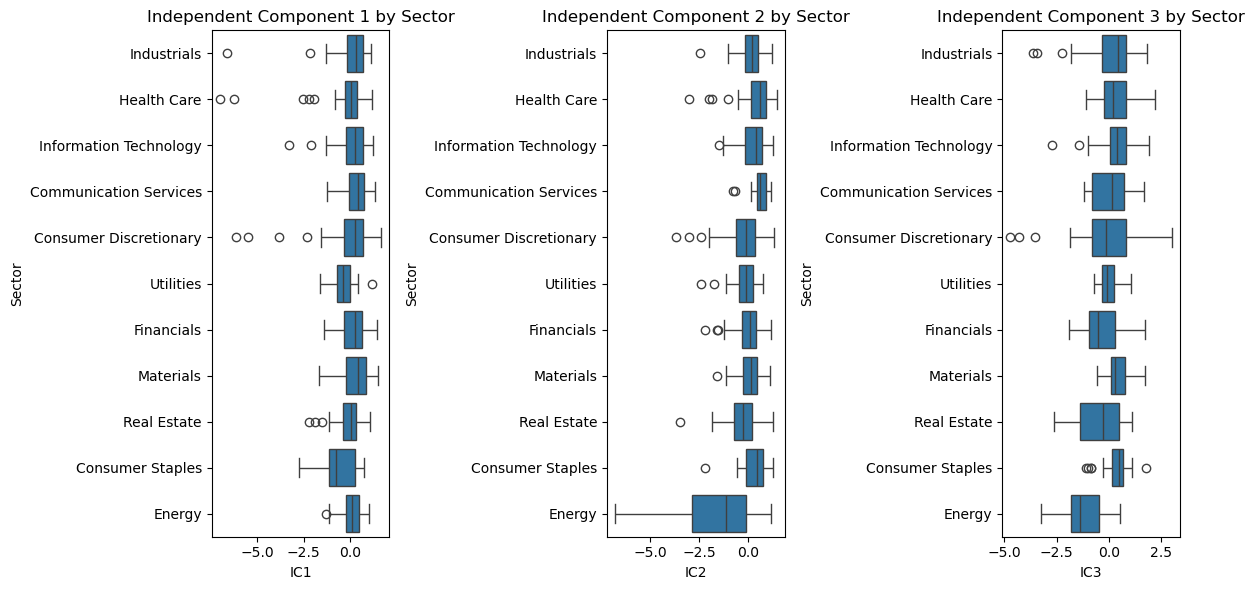

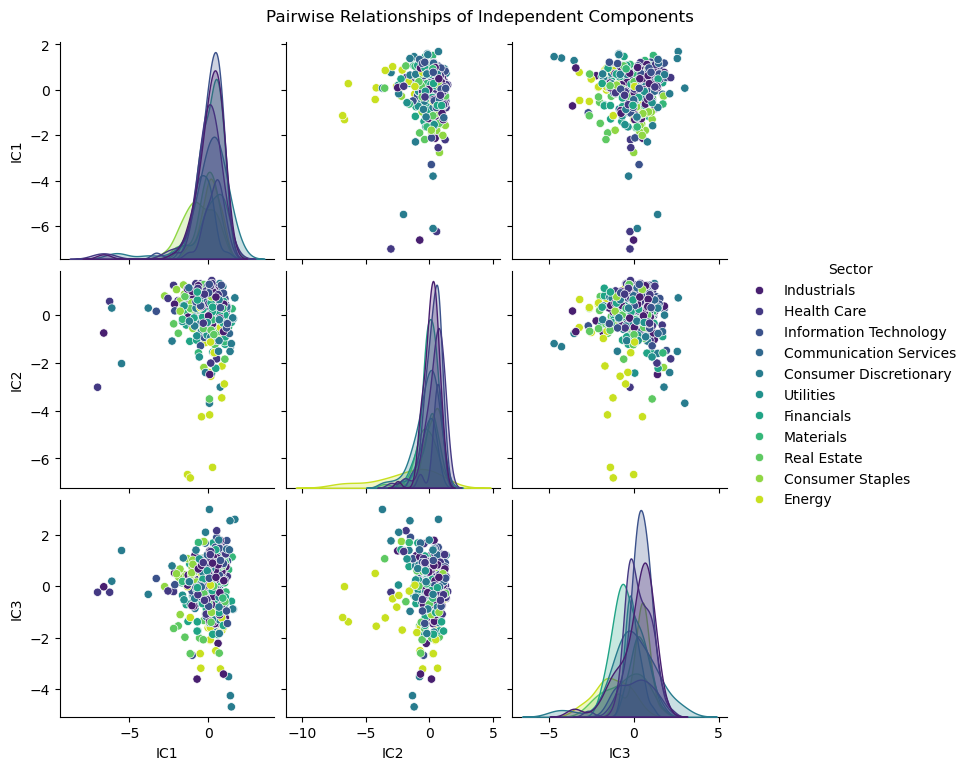

In [9]:
#独立成分分析
# 确定最佳成分数量 - 这里我们尝试2-4个成分
n_components_range = range(2, 5)
ica_models = {}

for n in n_components_range:
    ica = FastICA(n_components=n, random_state=42, max_iter=1000)
    components = ica.fit_transform(scaled_features)
    ica_models[n] = (ica, components)
    
# 选择3个成分作为示例
best_n = 3
ica, components = ica_models[best_n]
# 创建包含ICA成分的DataFrame
components_df = pd.DataFrame(components, 
                            columns=[f'IC{i+1}' for i in range(best_n)])
components_df['Sector'] = sectors.values

# 1. 各成分的权重(混合矩阵)
# 修正混合矩阵的创建方式
print("\n混合矩阵(各原始变量对成分的贡献):")
# ica.mixing_ 的形状是 (n_features, n_components)
mixing_matrix = pd.DataFrame(ica.mixing_, 
                           index=features.columns,
                           columns=[f'IC{i+1}' for i in range(best_n)])
print(mixing_matrix)

# 2. 各成分在不同行业的分布
plt.figure(figsize=(12, 6))
for i in range(best_n):
    plt.subplot(1, best_n, i+1)
    sns.boxplot(data=components_df, y='Sector', x=f'IC{i+1}')
    plt.title(f'Independent Component {i+1} by Sector')
plt.tight_layout()
plt.show()

# 3. 成分间的关系
sns.pairplot(components_df, vars=[f'IC{i+1}' for i in range(best_n)], 
             hue='Sector', palette='viridis')
plt.suptitle('Pairwise Relationships of Independent Components', y=1.02)
plt.show()
#From the plot we can see that the IC3 plays the most significant role in the annual return of Annual Stock Yield
#IC1 may represent “market systemic risk” and IC2 may represent “industry-specific risk patterns.”